# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

In [ ]:
df = pd.read_csv('/content/Superstore Marketing Data - Sheet1.csv')

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


In [ ]:
df.shape

(2240, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isna().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


<Axes: >

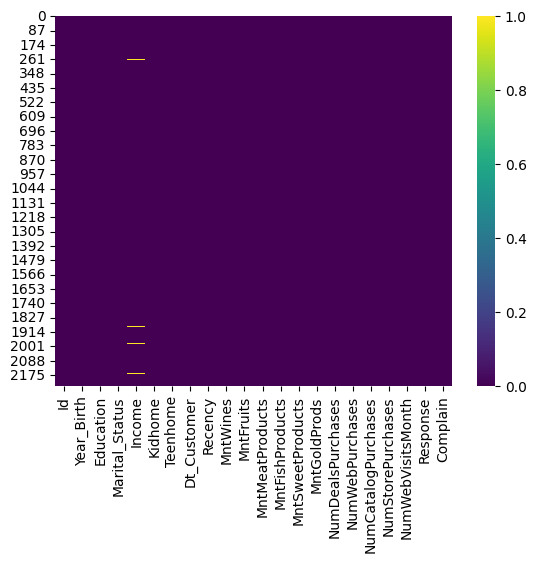

In [ ]:
df_na = df.isna()

sns.heatmap(df_na, cmap='viridis')

 following block categorizes all rows based on the 'birth_year' and 'education' columns
 For rows where the 'income' column contains missing values (NA),
 these missing values will be filled with the mean income for the corresponding
'birth_year' and 'education' group.


In [ ]:
# Step 1: Create a new column for birth year ranges
df['birth_year_range'] = pd.cut(df['Year_Birth'], bins=range(1890, 2021, 10), right=False)

# Step 2: Group by 'Education' and 'birth_year_range' and compute the mean income
mean_income = df.groupby(['Education', 'birth_year_range'])['Income'].transform('mean')

# Step 3: Fill NaN values in the 'Income' column with the computed mean income
df['income_filled'] = df['Income'].fillna(mean_income)

# Display the updated DataFrame
print("DataFrame after filling NaN values with group means:")
df



DataFrame after filling NaN values with group means:


<ipython-input-18-a889db46d3d0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_income = df.groupby(['Education', 'birth_year_range'])['Income'].transform('mean')


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,birth_year_range,income_filled
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,218,1,4,4,6,1,1,0,"[1970, 1980)",84835.0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,37,1,7,3,7,5,1,0,"[1960, 1970)",57091.0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,30,1,3,2,5,2,0,0,"[1950, 1960)",67267.0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,1,1,0,2,7,0,0,"[1960, 1970)",32474.0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,34,2,3,1,2,7,1,0,"[1980, 1990)",21474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,78,2,5,2,11,4,0,0,"[1970, 1980)",66476.0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,16,1,1,0,3,8,0,0,"[1970, 1980)",31056.0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,14,2,6,1,5,8,0,0,"[1970, 1980)",46310.0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,63,1,5,4,10,3,0,0,"[1970, 1980)",65819.0


In [ ]:
df['enroll Date'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

In [ ]:
df.drop(columns=['Dt_Customer'],inplace=True)

In [ ]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,birth_year_range,income_filled,enroll Date
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,1,4,4,6,1,1,0,"[1970, 1980)",84835.0,2014-06-16
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,1,7,3,7,5,1,0,"[1960, 1970)",57091.0,2014-06-15
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,1,3,2,5,2,0,0,"[1950, 1960)",67267.0,2014-05-13
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,1,1,0,2,7,0,0,"[1960, 1970)",32474.0,NaT
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,3,1,2,7,1,0,"[1980, 1990)",21474.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,99,372,18,...,2,5,2,11,4,0,0,"[1970, 1980)",66476.0,NaT
2236,5263,1977,2n Cycle,Married,31056.0,1,0,99,5,10,...,1,1,0,3,8,0,0,"[1970, 1980)",31056.0,2013-01-22
2237,22,1976,Graduation,Divorced,46310.0,1,0,99,185,2,...,2,6,1,5,8,0,0,"[1970, 1980)",46310.0,NaT
2238,528,1978,Graduation,Married,65819.0,0,0,99,267,38,...,1,5,4,10,3,0,0,"[1970, 1980)",65819.0,2012-11-29


In [ ]:
df['income_filled'].isna().sum()

0

In [ ]:

df.duplicated().sum()

0

as duplicates are not present in dataset there is no need to remove duplicates

In [ ]:
df['Age'] = 2024 - df['Year_Birth']

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)




---



<Axes: >

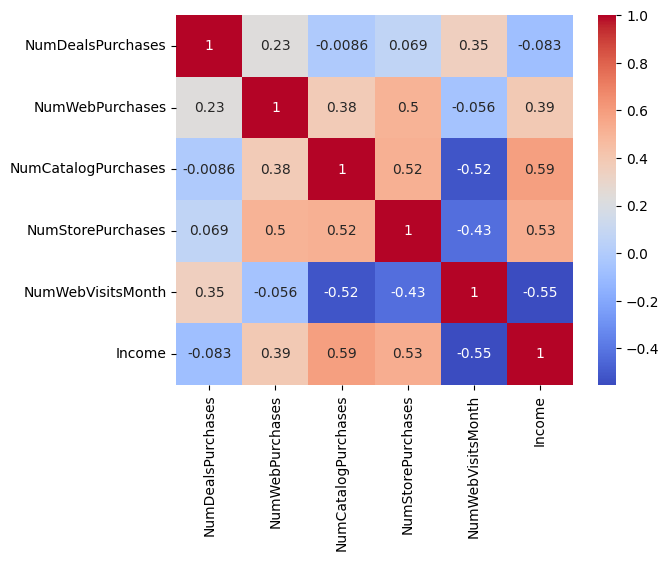

In [ ]:
corr2 = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth','Income']].corr()
sns.heatmap(corr2, annot=True, cmap='coolwarm')


Number of catalogue purchases are highly correlated with income


In [ ]:
df2 = df.corr(numeric_only=True)

<Axes: >

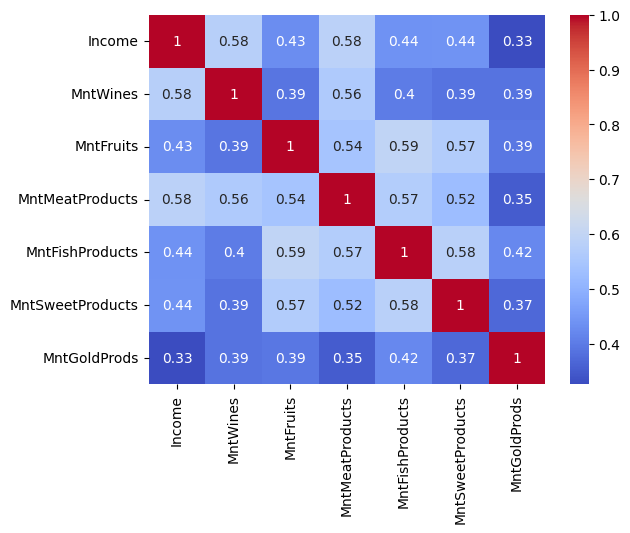

In [ ]:
corr = df[['Income','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:


df_mean = df.mean(numeric_only=True)
df_median = df.median(numeric_only=True)
df_mode = df.mode(numeric_only=True , axis=0)
df_var = df.var(numeric_only=True)
df_std = df.std(numeric_only=True)

df_mean.name = 'Mean'
df_median.name = 'Median'
dfmode_reset = df_mode.reset_index().iloc[0,:]
dfmode_reset.name = 'Mode'
df_var.name = 'Variance'
df_std.name = 'Standard Deviation'




merged_df = pd.concat([df_mean,df_median,dfmode_reset,df_var,df_std],join='outer',axis=1)


merged_df

,Mean,Median,Mode,Variance,Standard Deviation
Id,5592.159821,5458.5,0.0,1.054082e+07,3246.662198
Year_Birth,1968.805804,1970.0,1976.0,1.436179e+02,11.984069
Income,52247.251354,51381.5,7500.0,6.336838e+08,25173.076661
Kidhome,0.444196,0.0,0.0,2.898725e-01,0.538398
Teenhome,0.506250,0.0,0.0,2.965219e-01,0.544538
Recency,49.109375,49.0,56.0,8.388237e+02,28.962453
MntWines,303.935714,173.5,2.0,1.132978e+05,336.597393
MntFruits,26.302232,8.0,0.0,1.581926e+03,39.773434
MntMeatProducts,166.950000,67.0,7.0,5.094743e+04,225.715373
MntFishProducts,37.525446,12.0,0.0,2.984325e+03,54.628979


In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,income_filled,enroll Date
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,1324
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375,52252.097015,2013-07-19 09:00:32.628398848
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,2012-07-30 00:00:00
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,35538.750000,2013-01-26 00:00:00
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,51498.500000,2013-07-21 12:00:00
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,68289.750000,2014-01-15 00:00:00
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,666666.000000,2014-06-29 00:00:00
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391,25044.894355,NaN


In [ ]:
df_corr = df.corr(numeric_only=True)
df_corr

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,income_filled
Id,1.000000,0.000028,0.013095,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.021968,0.033883,0.012662
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.021325,-0.030128,-0.162791
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,0.133047,-0.027225,1.000000
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,-0.080008,0.040207,-0.424807
Teenhome,-0.002580,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.154446,0.003138,0.019988
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.198437,0.013231,-0.003047
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.247254,-0.039007,0.576677
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.125289,-0.005166,0.428946
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.236335,-0.023483,0.576360
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.111331,-0.020953,0.437768


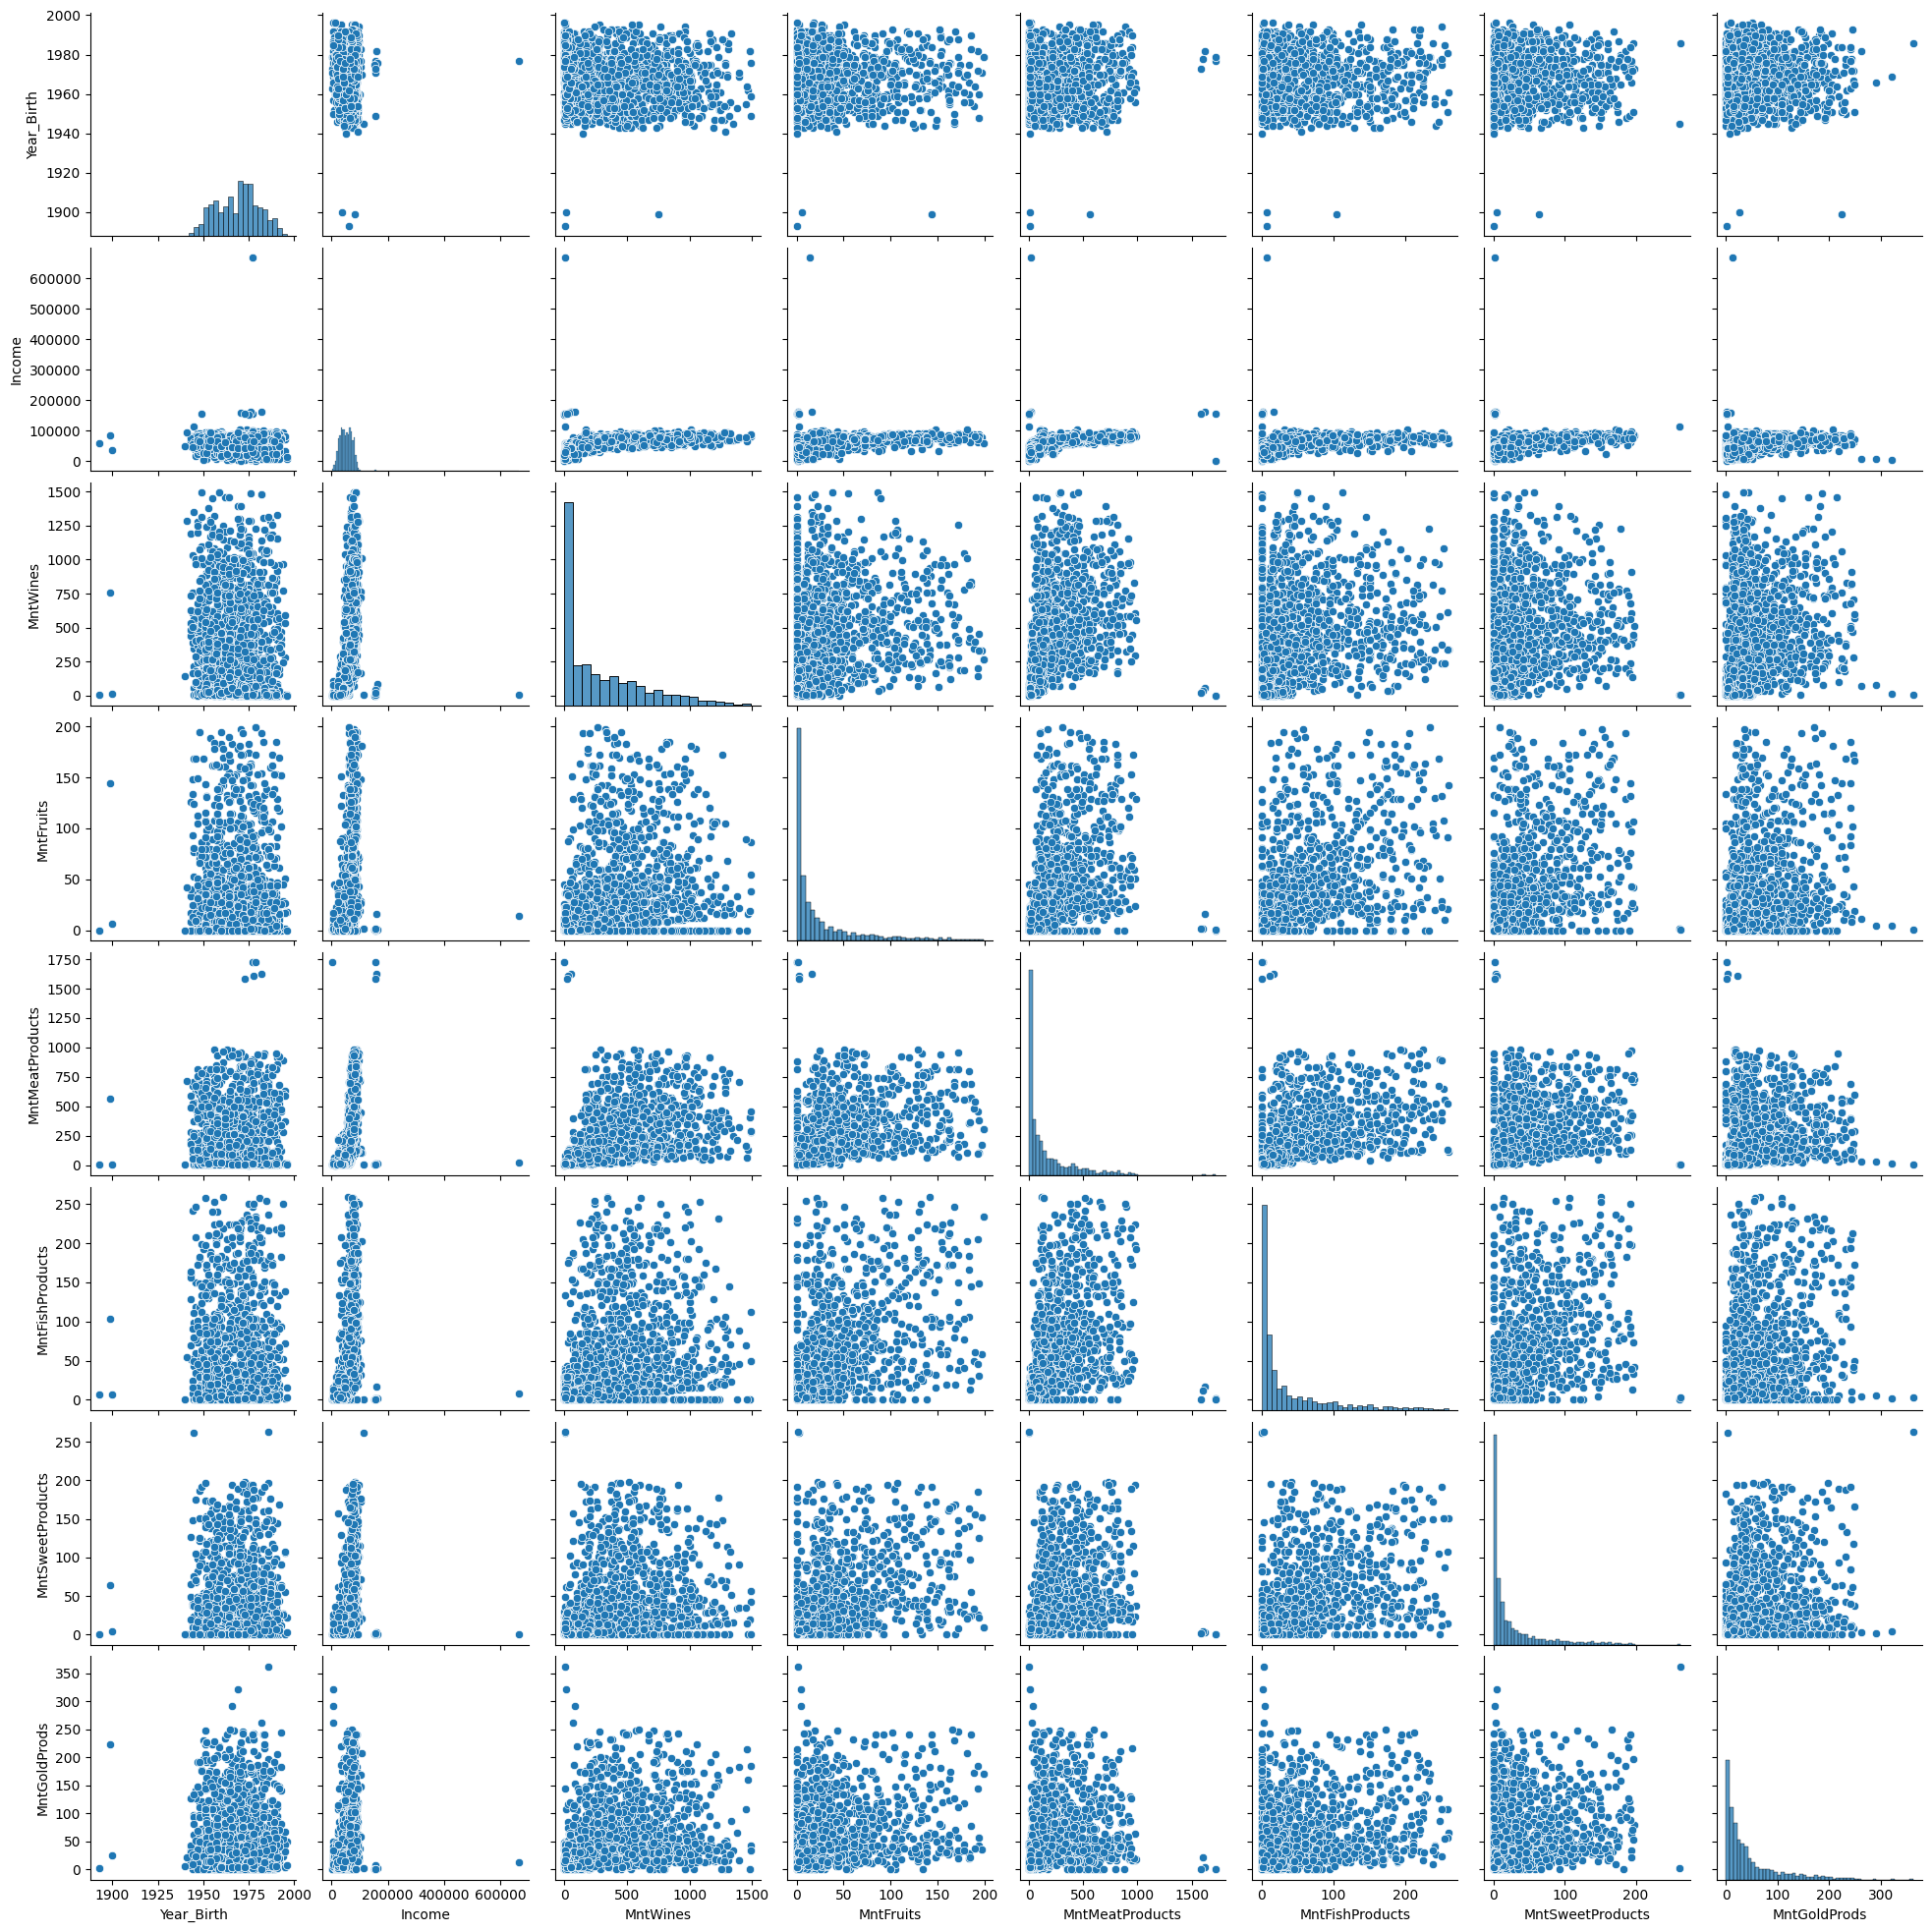

In [ ]:
sns.pairplot(df[['Year_Birth','Income','MntWines',	'MntFruits'	,'MntMeatProducts'	,'MntFishProducts'	,'MntSweetProducts'	,'MntGoldProds'	]])

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



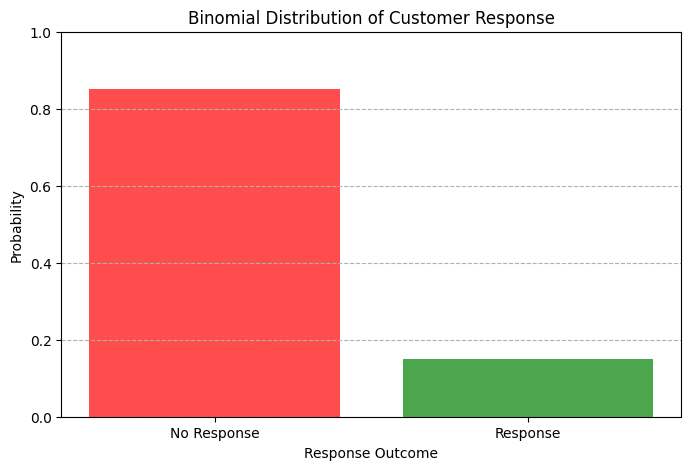

In [ ]:
response_prob = df['Response'].mean()

# Set parameters for the Binomial distribution
n = 1  # number of trials
p = response_prob  # probability of success (response)

# Generate possible outcomes (0 = no response, 1 = response)
x = [0, 1]  # outcomes
probabilities = [binom.pmf(k, n, p) for k in x]  # PMF for each outcome

# Plotting the Binomial distribution
plt.figure(figsize=(8, 5))
plt.bar(x, probabilities, color=['red', 'green'], alpha=0.7, tick_label=['No Response', 'Response'])
plt.title('Binomial Distribution of Customer Response')
plt.xlabel('Response Outcome')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--')
plt.show()

Response (Binomial Distribution):

Probability of response: 14.91%
Expected value: 0.149 (since it's a binary variable with
𝑛
=
1
n=1)

In [ ]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'birth_year_range', 'income_filled', 'enroll Date'],
      dtype='object')

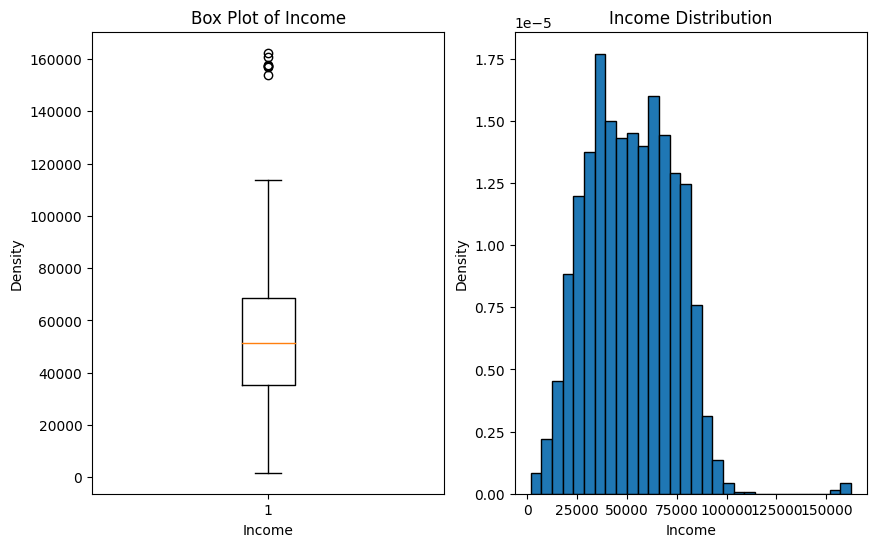

In [ ]:
fig , ax =plt.subplots(nrows=1, ncols=2,figsize=(10, 6))


df['Income'] = df[df['Income']<300000]["Income"]


ax[1].hist(df['Income'], bins=30, edgecolor='black', density=True)
ax[1].set_title("Income Distribution")
ax[1].set_xlabel("Income")
ax[1].set_ylabel("Density")



ax[0].boxplot(df[df['Income']<300000]["Income"],vert=True)
ax[0].set_title("Box Plot of Income")
ax[0].set_xlabel("Income")
ax[0].set_ylabel("Density")
plt.show()

Distribution of income seems to be  in normal distribution

In [ ]:
df['MntWines'].value_counts()

,count
MntWines,
2,42
5,40
6,37
1,37
4,33
...,...
1302,1
109,1
545,1


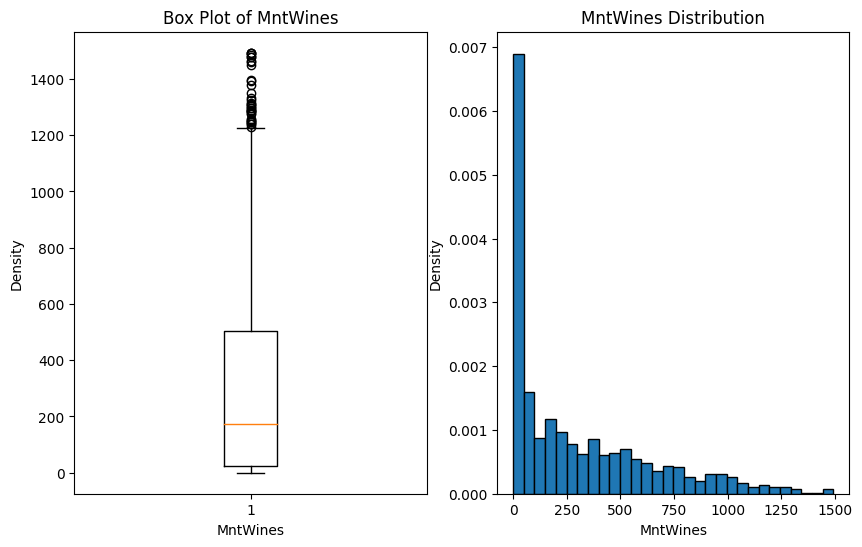

In [ ]:
fig , ax =plt.subplots(nrows=1, ncols=2,figsize=(10, 6))




ax[1].hist(df['MntWines'], bins=30, edgecolor='black', density=True)
ax[1].set_title("MntWines Distribution")
ax[1].set_xlabel("MntWines")
ax[1].set_ylabel("Density")



ax[0].boxplot(df['MntWines'],vert=True)
ax[0].set_title("Box Plot of MntWines")
ax[0].set_xlabel("MntWines")
ax[0].set_ylabel("Density")
plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

In [ ]:
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds']].sum(axis=1)



df.groupby('Age_Group')['Total_Spend'].mean()

<ipython-input-48-75e2f1105ef3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Total_Spend'].mean()


,Total_Spend
Age_Group,
18-24,NaN
25-34,697.032967
35-44,532.704663
45-54,536.324538
55-64,626.975309
65+,726.259690


avg total spent are by 65+ Age Group is highest among age groupes


In [ ]:
x = (df.groupby('Age_Group')['Id'].count()/df['Id'].count())*100


formatted_age_groups = {age_group: f"{percentage:.2f}% of customers are in the age group '{age_group}'"
                         for age_group, percentage in zip(x.index, x)}

# Display the formatted results
for result in formatted_age_groups.values():
    print(result)

0.00% of customers are in the age group '18-24'
4.06% of customers are in the age group '25-34'
17.23% of customers are in the age group '35-44'
33.84% of customers are in the age group '45-54'
21.70% of customers are in the age group '55-64'
23.04% of customers are in the age group '65+'


<ipython-input-49-6954dcedeeb4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = (df.groupby('Age_Group')['Id'].count()/df['Id'].count())*100


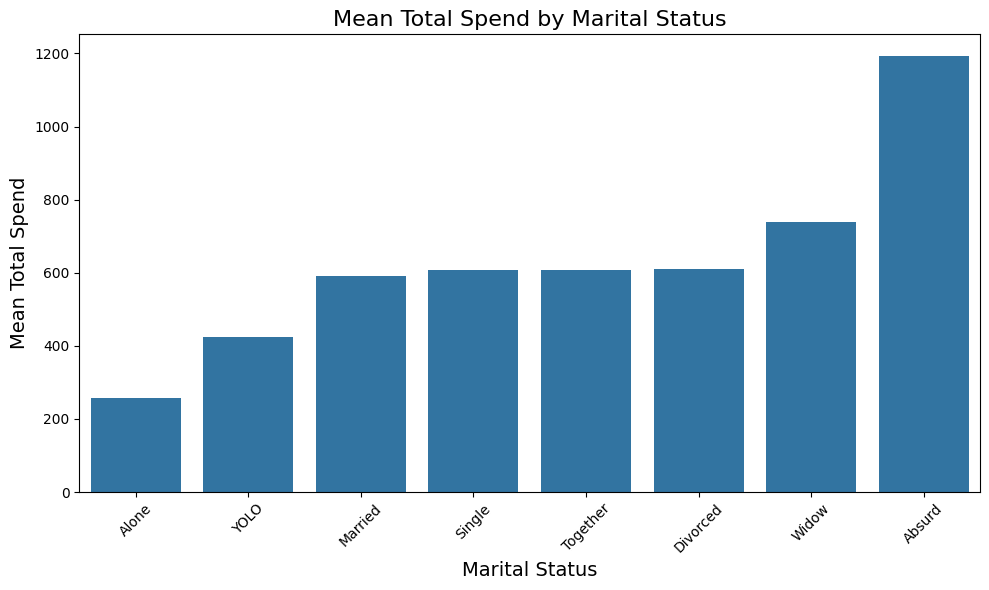

In [ ]:


mean_spend_by_marital_status = df.groupby('Marital_Status')['Total_Spend'].mean().sort_values()

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_spend_by_marital_status.index, y=mean_spend_by_marital_status.values)

# Customizing the plot
plt.title('Mean Total Spend by Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Mean Total Spend', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()

total spend by people having 'Absurd' Marital_status are significantly highr than that of other classes

In [ ]:
df.groupby('Education')['Total_Spend'].mean()


,Total_Spend
Education,
2n Cycle,496.527094
Basic,81.796296
Graduation,619.898846
Master,611.781081
PhD,672.409465


most customers are well Educated

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Income'>

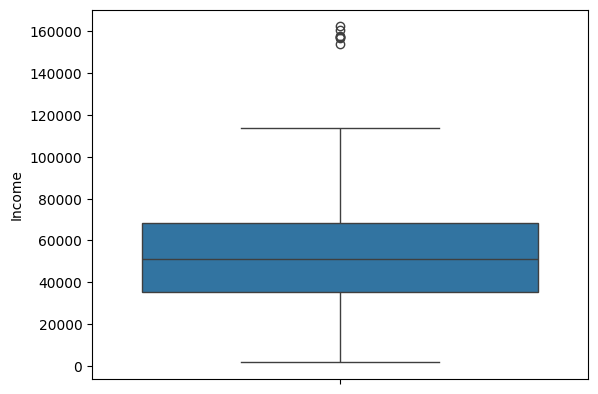

In [ ]:
sns.boxplot(df['Income'])

<ipython-input-54-d02533f3ff9c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spent_by_income = df.groupby('Income_Bracket')['Total_Spend'].mean()


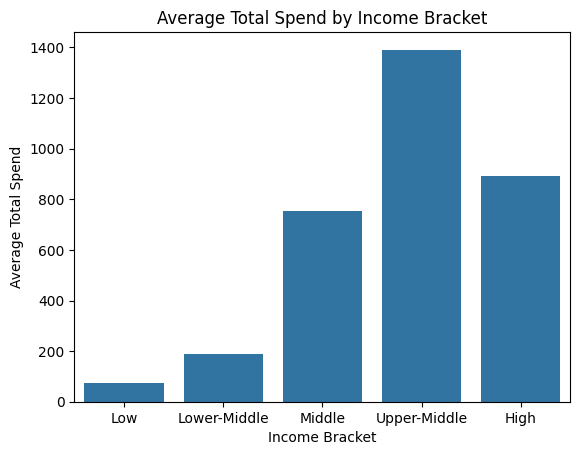

In [ ]:
income_bins = [0, 30000, 50000, 70000, 100000, 200000]
income_labels = ['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High']
df['Income_Bracket'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Average spend by income bracket
total_spent_by_income = df.groupby('Income_Bracket')['Total_Spend'].mean()

sns.barplot(x=total_spent_by_income.index, y=total_spent_by_income.values)
plt.title('Average Total Spend by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Total Spend')
plt.show()


upper_middle_class meaning customers having income in range 70000, 100000 are high spenders

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Age_Group', ylabel='Total_Spend'>

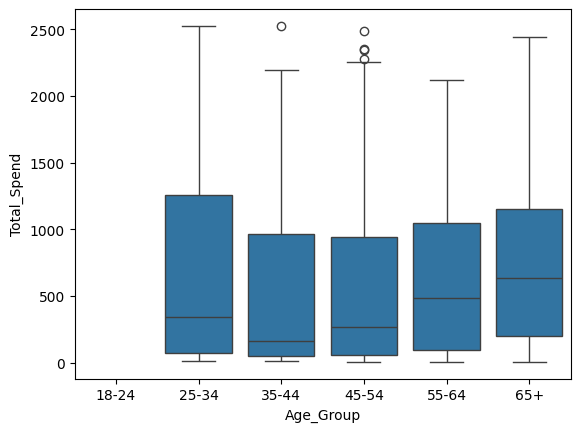

In [ ]:
sns.boxplot(x='Age_Group', y='Total_Spend', data=df)


<Axes: xlabel='Income', ylabel='Total_Spend'>

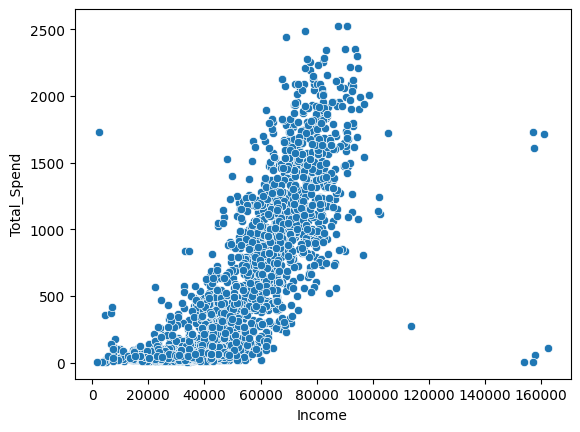

In [ ]:
sns.scatterplot(x='Income', y='Total_Spend', data=df)

<ipython-input-57-c9afeeb3309f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_campaign_values = df[df['Response'] == 1].groupby('Age_Group')['Total_Spend'].mean()
<ipython-input-57-c9afeeb3309f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_overall_values = df.groupby('Age_Group')['Total_Spend'].mean()


<BarContainer object of 6 artists>

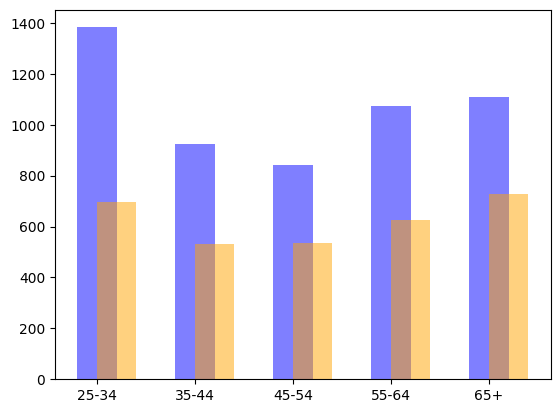

In [ ]:
avg_campaign_values = df[df['Response'] == 1].groupby('Age_Group')['Total_Spend'].mean()
avg_overall_values = df.groupby('Age_Group')['Total_Spend'].mean()

plt.bar( ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],avg_campaign_values, alpha=0.5, label='Avg Total Spend (Campaign)', color='blue', width=0.4, align='center')

# Bar plot for overall average total spend
plt.bar(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], avg_overall_values, alpha=0.5, label='Avg Total Spend (Overall)', color='orange', width=0.4, align='edge')



Among the participant in last campaign most spent are by 25 to 34 age group customers


also avg spent in each age_groups is higher in campaign participents than that of overall customers

In [ ]:
df.groupby('Complain')['Total_Spend'].mean()


,Total_Spend
Complain,
0,607.968905
1,376.428571


In [ ]:
df['Frequency'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df.sort_values(by='Frequency')


df.groupby('Marital_Status')['Frequency'].sum()

,Frequency
Marital_Status,
Absurd,35
Alone,29
Divorced,2970
Married,10855
Single,5814
Together,7246
Widow,1106
YOLO,28


Married people have highest frequency of buying


## Task 5: Conclusion and Recommendations


Distributions:

Income of customers is distributed as normal Distribution

All the amount spent on different products seemes to be in pareto distribution


---

0.00% of customers are in the age group '18-24'

4.06% of customers are in the age group '25-34'

17.23% of customers are in the age group '35-44'

33.84% of customers are in the age group '45-54'

21.70% of customers are in the age group '55-64'

23.04% of customers are in the age group '65+'

Targeted Marketing: Develop targeted marketing campaigns aimed at younger demographics to increase engagement among the 18-34 age groups.

Product Customization: Tailor products or services specifically for the 45-54 and 55-64 age groups to enhance customer satisfaction and loyalty.

Community Engagement: Consider hosting events, workshops, or online forums that appeal to the interests of seniors and middle-aged customers to enhance brand loyalty and community connection.

---


Avg total spent are by 65+ Age Group is highest among age groupes

The 65+ age group exhibiting the highest average total spend suggests that this demographic may possess significant spending power. This could be attributed to various factors such as retirement savings, pension benefits, or the accumulation of wealth over their lifetime.



---



total spend by people having 'Absurd' Marital_status are significantly highr than that of other classes

---

most customers are well Educated

---

upper_middle_class meaning customers having income in range 70000, 100000 are high spenders

Develop marketing campaigns that appeal specifically to the interests and preferences of upper-middle-class customers. Highlight the quality, exclusivity, and prestige of products or services to attract this demographic.

Develop marketing campaigns that appeal specifically to the interests and preferences of upper-middle-class customers. Highlight the quality, exclusivity, and prestige of products or services to attract this demographic.

Engage this demographic through personalized communication and customer service. Providing tailored recommendations based on past purchases can enhance their shopping experience and foster loyalty

---

Among the participant in last campaign most spent are by 25 to 34 age group customers


also avg spent in each age_groups is higher in campaign participents than that of overall customers

Segmented Campaigns:
Consider creating more targeted campaigns specifically aimed at the 25 to 34 age group, utilizing insights from the previous campaign to design offers that align with their interests and spending behaviors.
Leverage Successful Strategies:

Analyze the successful elements of the last campaign that led to higher spending among participants. This could include promotional techniques, product offerings, or engagement strategies. Replicating these elements in future campaigns can enhance effectiveness.


Incentives for Participation:
Offer incentives to encourage participation in future campaigns, such as exclusive discounts, loyalty points, or bundled offers, particularly aimed at the younger demographic.


Cross-Generational Strategies:
Since average spending is higher among campaign participants across all age groups, it may be beneficial to develop campaigns that appeal to multiple age groups, encouraging broader participation while still catering to the interests of specific demographics.


---

Married people have highest frequency of buying

Frequent Purchases:
Married individuals are likely to make more frequent purchases due to household needs and family responsibilities, which may lead to consistent buying behavior.


Family-Centric Spending:
This demographic may prioritize family-oriented products and services, suggesting that marketing strategies should highlight items that benefit the household or support family life.


Joint Decision-Making:
The purchasing decisions in married couples often involve both partners, potentially leading to a higher frequency of purchases as both individuals contribute to household spending.


Stability and Budgeting:
Married couples may have more stable incomes and better budgeting practices, allowing for regular discretionary spending on goods and services